In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('../Data/cement_slump.csv')

In [33]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


<AxesSubplot:>

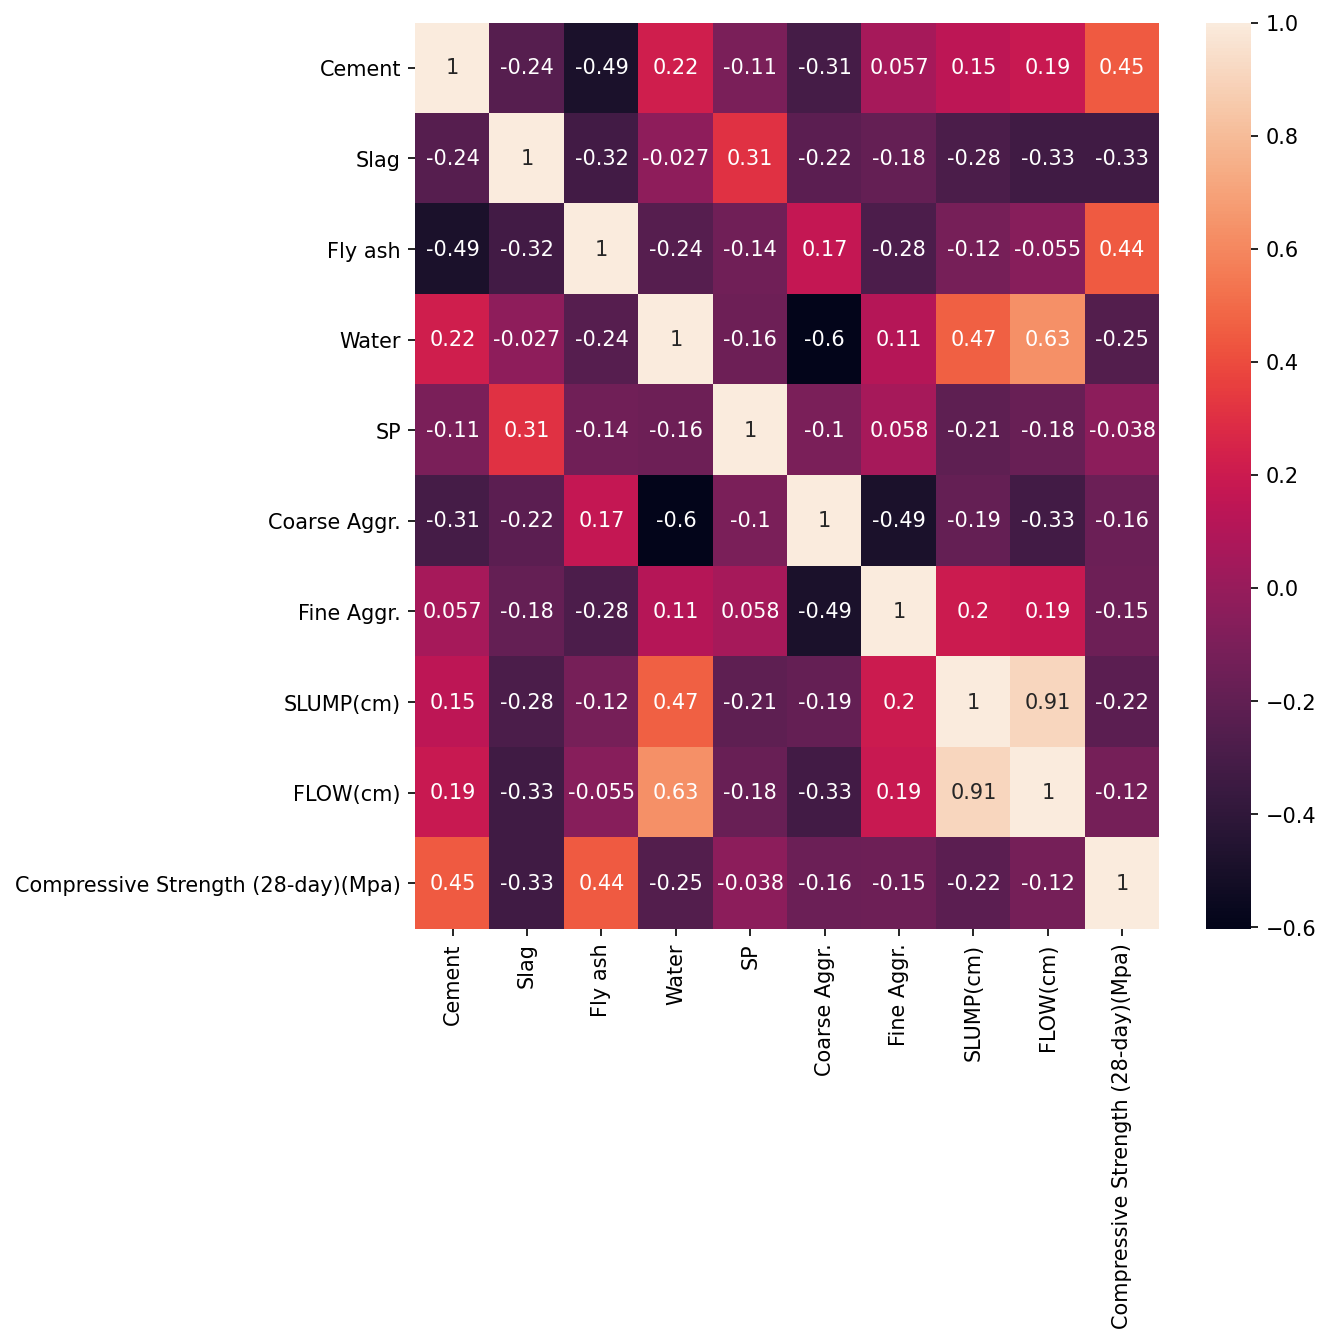

In [35]:
plt.figure(figsize=(8, 8), dpi=150)
sns.heatmap(df.corr(), annot=True)

In [36]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [37]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [39]:
svr = SVR()

In [41]:
from sklearn.pipeline import Pipeline

In [40]:
operations = [('scaler', scaler), ('svr', svr)]

In [42]:
pipe = Pipeline(operations)

In [43]:
param_grid = {'svr__kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'svr__degree': [2, 3, 4], 'svr__gamma':['scale', 'auto'],
             'svr__C':[0.01, 0.1, 1, 10], 'svr__epsilon':[0, 0.1, 0.5, 10]}

In [44]:
grid = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', verbose=2, cv=5)

In [45]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0, svr__gamma=scale, 

[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=2, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] EN

[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.0

[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0

[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degre

[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.01, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END s

[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr_

[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1,

[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END

[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=3, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__deg

[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1

[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__d

[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=2, s

[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0, sv

[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=3, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__

[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=0, svr__ga

[CV] END svr__C=1, svr__degree=4, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=1, svr__degree=4, svr__eps

[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, sv

[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=0.5, svr__gamma=auto, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=2, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=

[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=0.1, svr__gamma=auto, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C

[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=3, svr__epsilon=10, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__de

[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=0.1, svr__gamma=scale, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10

[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr__epsilon=10, svr__gamma=auto, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10, svr__degree=4, svr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.01, 0.1, 1, 10], 'svr__degree': [2, 3, 4],
                         'svr__epsilon': [0, 0.1, 0.5, 10],
                         'svr__gamma': ['scale', 'auto'],
                         'svr__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='neg_mean_squared_error', verbose=2)

In [46]:
grid.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('svr', SVR(C=1, degree=2, epsilon=0.5, kernel='linear'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'svr': SVR(C=1, degree=2, epsilon=0.5, kernel='linear'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'svr__C': 1,
 'svr__cache_size': 200,
 'svr__coef0': 0.0,
 'svr__degree': 2,
 'svr__epsilon': 0.5,
 'svr__gamma': 'scale',
 'svr__kernel': 'linear',
 'svr__max_iter': -1,
 'svr__shrinking': True,
 'svr__tol': 0.001,
 'svr__verbose': False}

In [47]:
pred = grid.predict(X_test)

In [48]:
mean_absolute_error(y_test, pred)

1.9851602705164617

In [49]:
np.sqrt(mean_squared_error(y_test, pred))

2.542743317744303

In [50]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [51]:
df['Compressive Strength (28-day)(Mpa)'].mean()

36.03873786407767